# TNE 2: Principal Component Analysis

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [78]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as la
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


/home/cindy/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft', 'power', 'linalg', 'random', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [79]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

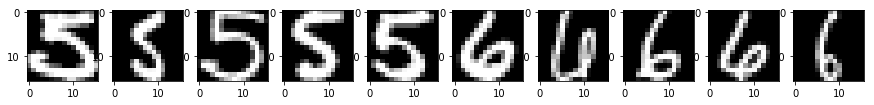

In [80]:
for n in range (5):
    I = np.reshape(train_5[n,:],(16,16))
    plt.subplot(1,10,n+1)
    plt.imshow(I,cmap='gray')

    
for n in range (5):
    I = np.reshape(train_6[n,:],(16,16))
    plt.subplot(1,10,n+6)
    plt.imshow(I,cmap='gray')


#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [81]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [82]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))
print(x_train_centre.shape)
# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(x_train_centre)  # computes the projection coefficients
print(comp.shape)

(345, 256)
(256, 256)


### Display the averaged images of 5 & 6 respectively

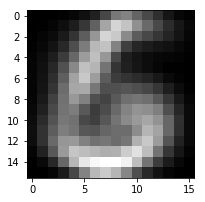

In [91]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.figure(figsize=(3,5))
plt.imshow(I_moy,cmap = 'gray')
plt.show()

### Display an example rebuilt from the 1st component only

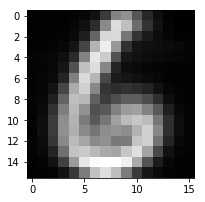

In [92]:
n=12   # choice of image no n=12 or any other
plt.figure(figsize=(3,5))
I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))# adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.
2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.
3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?
4. Optional question: do the same for 6.


###### Function tools

In [86]:
def projected_images (x_train_brut, N_comp):
    """ 
    Returns a projected image on the first N_comp with PCA
    - x_train_brut : raw training data
    - N_comp : number of components of PCA we want to project our image
    
    
    Returns:
    - array of size (N_train,16,16) images reconstructed with the first N_comp of pca
    """
    pca = PCA(n_components=N_comp,
              copy=True, whiten=False, svd_solver='auto',
              tol=0.0, iterated_power='auto',
              random_state=None)
    
    N_train = x_train_brut.shape[0]
    moy_train = x_train_brut.mean(axis=0)
    x_train_centre = x_train_brut-moy_train
    
    pca.fit(x_train_centre)
    
    first_N_comp = pca.components_     # principal components
    first_N_coeff = pca.transform(x_train_centre)  # computes the projection coefficients
    
    images = (first_N_coeff.dot(first_N_comp)+moy_train).reshape((N_train,16,16))
    
    return images

###### Reconstructed images

Text(0.5,1,'original')

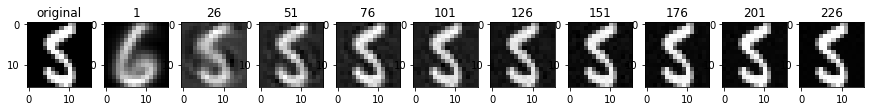

In [93]:
# Digits 5
index_ex=1
nb_display = 10
interval_comp = np.floor(x_train_brut.shape[1]/nb_display)

for n in range(nb_display):
    plt.subplot(1,nb_display+1,n+2)
    N_comp = (n*interval_comp+1)
    plt.imshow(projected_images(x_train_brut,int(N_comp))[index_ex,:,:],cmap='gray')
    plt.title(int(N_comp))

plt.subplot(1,nb_display+1,1)    
plt.imshow(x_train_brut[index_ex].reshape((16,16)),cmap="gray")
plt.title("original")
  

Text(0.5,1,'original')

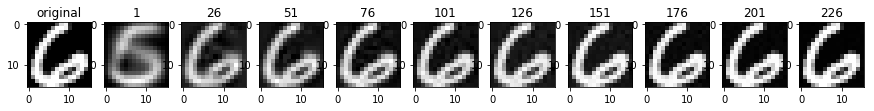

In [94]:
# Digits 6
index_ex=210
nb_display = 10
interval_comp = np.floor(x_train_brut.shape[1]/nb_display)

for n in range(nb_display):
    plt.subplot(1,nb_display+1,n+2)
    N_comp = (n*interval_comp+1)
    plt.imshow(projected_images(x_train_brut,int(N_comp))[index_ex,:,:],cmap='gray')
    plt.title(int(N_comp))

plt.subplot(1,nb_display+1,1)    
plt.imshow(x_train_brut[index_ex].reshape((16,16)),cmap="gray")
plt.title("original")
  

We can consider the picture : 
- acceptable when there are approximately more than 50 components
- nice : >100
- very nice: >150
<br> PCA reduces dimensionality very efficiently!

### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


(345, 256)


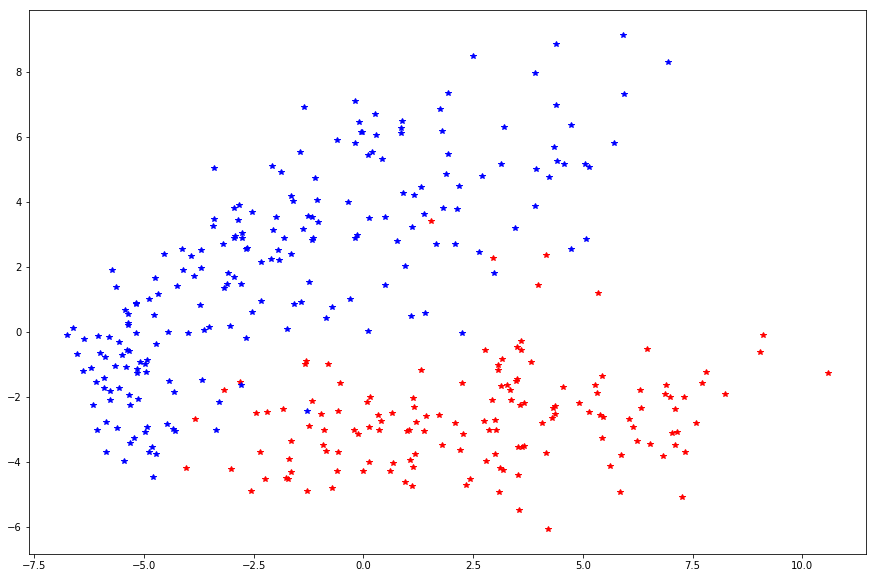

In [97]:
# Exercise 2
print(proj.shape)
plt.plot(proj[:145,0],proj[:145,1],"r*")
plt.plot(proj[145:,0],proj[145:,1],"b*")

## Beyond this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
    